# Unsupervised Lab Session - 
### Submission by Shivam Tiwari


## Learning outcomes:
- Exploratory data analysis and data preparation for model building.
- PCA for dimensionality reduction.
- K-means and Agglomerative Clustering

## Problem Statement
Based on the given marketing campigan dataset, segment the similar customers into suitable clusters. Analyze the clusters and provide your insights to help the organization promote their business.

## Context:
- Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.
- Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

## About dataset
- Source: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis?datasetId=1546318&sortBy=voteCount

### Attribute Information:
- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise
- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

### 1. Import required libraries

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler
from scipy import stats
from sklearn.cluster import KMeans
from scipy.stats import zscore
from scipy.spatial import distance
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer

### 2. Load the CSV file (i.e marketing.csv) and display the first 5 rows of the dataframe. Check the shape and info of the dataset.

In [2]:
# reading the dataset

df = pd.read_csv('marketing.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0


In [3]:
# Shape of the dataset

df.shape

(2240, 27)

In [4]:
# Dataset info about columns & datatypes and no of entries

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### 3. Check the percentage of missing values? If there is presence of missing values, treat them accordingly.

In [5]:
# Checking the % of missing values in the columns

df.isna().sum()/len(df) *100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Response               0.000000
dtype: float64

In [6]:
# Imputing the Income column by the mean value in place of missing values

df['Income'] = df['Income'].fillna(df['Income'].mean())

# Rechecking missing values in Income after imputation

df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
dtype: int64

### 4. Check if there are any duplicate records in the dataset? If any drop them.

In [7]:
df.duplicated().sum()        # no duplicates found

0

### 5. Drop the columns which you think redundant for the analysis 

In [8]:
# Dropping the redundant columns like ID & Dt_Customer

df = df.drop(columns = ['ID','Dt_Customer'], axis=1)


In [9]:
# Rechcking columns after dropping the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2240 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Recency              2240 non-null   int64  
 7   MntWines             2240 non-null   int64  
 8   MntFruits            2240 non-null   int64  
 9   MntMeatProducts      2240 non-null   int64  
 10  MntFishProducts      2240 non-null   int64  
 11  MntSweetProducts     2240 non-null   int64  
 12  MntGoldProds         2240 non-null   int64  
 13  NumDealsPurchases    2240 non-null   int64  
 14  NumWebPurchases      2240 non-null   int64  
 15  NumCatalogPurchases  2240 non-null   i

### 6. Check the unique categories in the column 'Marital_Status'
- i) Group categories 'Married', 'Together' as 'relationship'
- ii) Group categories 'Divorced', 'Widow', 'Alone', 'YOLO', and 'Absurd' as 'Single'.

In [10]:
# Checking the unique values present in the Marital_Status column

df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [11]:
# Checking Marital Status categorical columns for their individual values using value_counts() method

df['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [12]:
# Grouping categories 'Married', 'Together' as 'relationship'
df['Marital_Status'] = df['Marital_Status'].map(lambda x: 'relationship' if x in ['Married', 'Together'] else x)

# Grouping categories 'Divorced', 'Widow', 'Alone', 'YOLO', and 'Absurd' as 'Single'.
df['Marital_Status'] = df['Marital_Status'].map(lambda x: 'Single' if x in ['Divorced', 'Widow','Alone', 'YOLO','Absurd'] else x)

# Rechecking after grouping values
df['Marital_Status'].value_counts()

Marital_Status
relationship    1444
Single           796
Name: count, dtype: int64

### 7. Group the columns 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', and 'MntGoldProds' as 'Total_Expenses'

In [13]:
cols_to_add = ['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']
df['Total_Expenses'] = df[cols_to_add].sum(axis=1)
df.head()


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Expenses
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,...,4,7,0,0,0,0,0,0,1,1617
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,...,2,5,0,0,0,0,0,0,0,27
2,1965,Graduation,relationship,71613.0,0,0,26,426,49,127,...,10,4,0,0,0,0,0,0,0,776
3,1984,Graduation,relationship,26646.0,1,0,26,11,4,20,...,4,6,0,0,0,0,0,0,0,53
4,1981,PhD,relationship,58293.0,1,0,94,173,43,118,...,6,5,0,0,0,0,0,0,0,422


### 8. Group the columns 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', and 'NumDealsPurchases' as 'Num_Total_Purchases'

In [14]:
cols_to_add = ['NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumDealsPurchases']
df['Num_Total_Purchases'] = df[cols_to_add].sum(axis=1)
df.head()


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Expenses,Num_Total_Purchases
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,...,7,0,0,0,0,0,0,1,1617,25
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,...,5,0,0,0,0,0,0,0,27,6
2,1965,Graduation,relationship,71613.0,0,0,26,426,49,127,...,4,0,0,0,0,0,0,0,776,21
3,1984,Graduation,relationship,26646.0,1,0,26,11,4,20,...,6,0,0,0,0,0,0,0,53,8
4,1981,PhD,relationship,58293.0,1,0,94,173,43,118,...,5,0,0,0,0,0,0,0,422,19


### 9. Group the columns 'Kidhome' and 'Teenhome' as 'Kids'

In [15]:
cols_to_add = ['Kidhome','Teenhome']
df['Kids'] = df[cols_to_add].sum(axis=1)
df.head()


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Expenses,Num_Total_Purchases,Kids
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,...,0,0,0,0,0,0,1,1617,25,0
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,...,0,0,0,0,0,0,0,27,6,2
2,1965,Graduation,relationship,71613.0,0,0,26,426,49,127,...,0,0,0,0,0,0,0,776,21,0
3,1984,Graduation,relationship,26646.0,1,0,26,11,4,20,...,0,0,0,0,0,0,0,53,8,1
4,1981,PhD,relationship,58293.0,1,0,94,173,43,118,...,0,0,0,0,0,0,0,422,19,1


### 10. Group columns 'AcceptedCmp1 , 2 , 3 , 4, 5' and 'Response' as 'TotalAcceptedCmp'

In [16]:
cols_to_add = ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']
df['TotalAcceptedCmp'] = df[cols_to_add].sum(axis=1)
df.head()


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,...,0,0,0,0,0,1,1617,25,0,1
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,...,0,0,0,0,0,0,27,6,2,0
2,1965,Graduation,relationship,71613.0,0,0,26,426,49,127,...,0,0,0,0,0,0,776,21,0,0
3,1984,Graduation,relationship,26646.0,1,0,26,11,4,20,...,0,0,0,0,0,0,53,8,1,0
4,1981,PhD,relationship,58293.0,1,0,94,173,43,118,...,0,0,0,0,0,0,422,19,1,0


### 11. Drop those columns which we have used above for obtaining new features

In [17]:
cols_to_drop = ['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumDealsPurchases','Kidhome','Teenhome','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']
df = df.drop(columns=cols_to_drop, axis=1)
df.head()


,Year_Birth,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp
0,1957,Graduation,Single,58138.0,58,7,0,1617,25,0,1
1,1954,Graduation,Single,46344.0,38,5,0,27,6,2,0
2,1965,Graduation,relationship,71613.0,26,4,0,776,21,0,0
3,1984,Graduation,relationship,26646.0,26,6,0,53,8,1,0
4,1981,PhD,relationship,58293.0,94,5,0,422,19,1,0


### 12. Extract 'age' using the column 'Year_Birth' and then drop the column 'Year_birth'

In [18]:
from datetime import datetime
curr_year = datetime.now().year
df['age'] = curr_year - df['Year_Birth']
df = df.drop('Year_Birth',axis=1)
df.head()


,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,age
0,Graduation,Single,58138.0,58,7,0,1617,25,0,1,67
1,Graduation,Single,46344.0,38,5,0,27,6,2,0,70
2,Graduation,relationship,71613.0,26,4,0,776,21,0,0,59
3,Graduation,relationship,26646.0,26,6,0,53,8,1,0,40
4,PhD,relationship,58293.0,94,5,0,422,19,1,0,43


### 13. Encode the categorical variables in the dataset

In [19]:
# keeing a copy 'dfc' before encoding the data.
dfc = df.copy()       

# Encoding the categorical columns
le = LabelEncoder()
categorical_columns = ['Education','Marital_Status']
for col in categorical_columns:
    df[col] = le.fit_transform( df[col] )

df.head(5)

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,age
0,2,0,58138.0,58,7,0,1617,25,0,1,67
1,2,0,46344.0,38,5,0,27,6,2,0,70
2,2,1,71613.0,26,4,0,776,21,0,0,59
3,2,1,26646.0,26,6,0,53,8,1,0,40
4,4,1,58293.0,94,5,0,422,19,1,0,43


### 14. Standardize the columns, so that values are in a particular range

In [20]:
# Keeing a copy 'dfc_2' before scaling the data columns
dfc_2 = df.copy()

# Scaling the columns to a standard scale
sc = StandardScaler()
all_columns = df.columns

scaled_df = pd.DataFrame(sc.fit_transform(df), columns=all_columns)
scaled_df.head()

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,age
0,-0.350141,-1.346874,0.235327,0.307039,0.693904,-0.097282,1.679417,1.320826,-1.264505,0.621248,0.985345
1,-0.350141,-1.346874,-0.235826,-0.383664,-0.130463,-0.097282,-0.961275,-1.154596,1.396361,-0.501912,1.235733
2,-0.350141,0.742460,0.773633,-0.798086,-0.542647,-0.097282,0.282673,0.799685,-1.264505,-0.501912,0.317643
3,-0.350141,0.742460,-1.022732,-0.798086,0.281720,-0.097282,-0.918094,-0.894025,0.065928,-0.501912,-1.268149
4,1.428354,0.742460,0.241519,1.550305,-0.130463,-0.097282,-0.305254,0.539114,0.065928,-0.501912,-1.017761


### 15. Apply PCA on the above dataset and determine the number of PCA components to be used so that 90-95% of the variance in data is explained by the same.

Text(0, 0.5, 'Explained variance ratio')

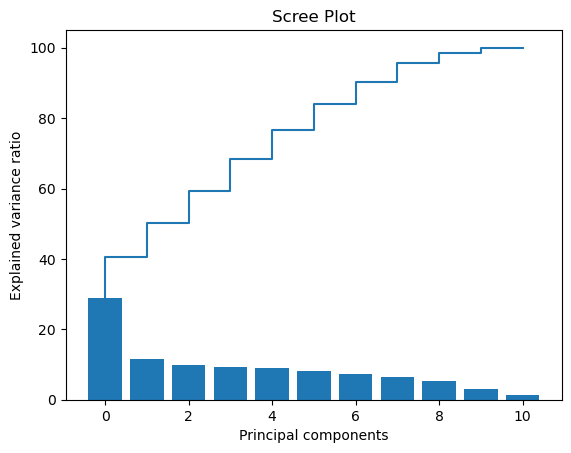

In [21]:
# Covariance matrix
cov_matrix = np.cov(scaled_df.T)
# cov_matrix

# Eigen values & Eigen vectors
eig_values, eig_vectors = np.linalg.eig(cov_matrix)

# Scree plot
total = sum(eig_values)
variance_explained = [ (i/total)*100 for i in sorted(eig_values, reverse=True) ]
cumulative_variance_explained = np.cumsum(variance_explained)

# Diagram
plt.bar(range(11), variance_explained)
plt.step(range(11),cumulative_variance_explained)
plt.title('Scree Plot')
plt.xlabel("Principal components")
plt.ylabel("Explained variance ratio")

- The above scree plot displays that the first 8 principal components are explaining the about 90-95% of the variation.
- Hence we can choose optimal number of principal components as 8.
- This helps us to reduce the dimentionality of the data without losing a huge information.

### 16. Apply K-means clustering and segment the data (Use PCA transformed data for clustering)

In [22]:
## Using the dimensions obtainted from the PCA to apply clustering.(i.e, 8)
pca = PCA(n_components=8)

pca_df = pd.DataFrame( pca.fit_transform(scaled_df), columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'] )

pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,1.956902,-0.081936,-0.344667,1.193687,-0.696970,-0.299137,-1.145041,-0.358094
1,-1.512598,1.000666,-0.367106,1.006953,-0.445000,1.371965,-0.724374,-0.346359
2,1.314538,-0.299417,0.296366,-0.764913,0.732877,0.984394,0.025389,0.058563
3,-1.755094,-1.139847,-0.254499,-0.825065,0.579217,0.221975,0.562426,0.239541
4,0.063584,0.571435,0.902243,-0.757574,-0.794825,-1.241683,1.325626,0.898316


Text(0.5, 1.0, 'Elbow Plot')

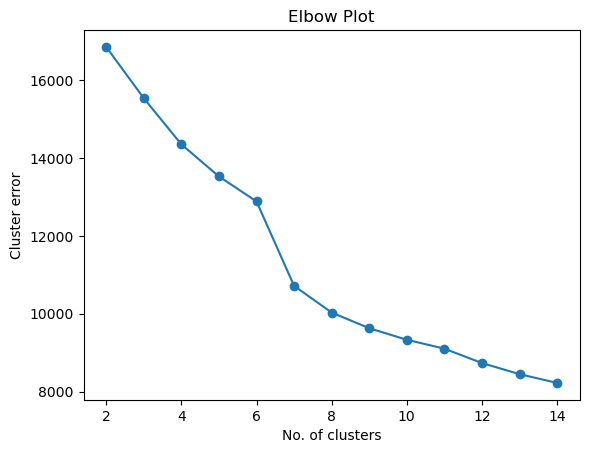

In [23]:
# finding the optimal K using elbow plot

cluster_errors = []
cluster_range = range(2,15)
for i in cluster_range:
    cluster = KMeans(i, random_state=100)
    cluster.fit(pca_df)
    cluster_errors.append(cluster.inertia_)

cluster_df = pd.DataFrame({'num_clusters':cluster_range, 'cluster_errors':cluster_errors})

plt.plot(cluster_df['num_clusters'],cluster_df['cluster_errors'], marker='o')
plt.xlabel("No. of clusters")
plt.ylabel("Cluster error")
plt.title('Elbow Plot')




- From the above elbow plot we can see at the cluster K=3, the inertia significantly decreases . Hence we can select our optimal clusters as K=3.

In [24]:
# Apply k means

kmeans = KMeans(n_clusters=3, random_state=100)
kmeans.fit(pca_df)

KMeans(n_clusters=3, random_state=100)

In [26]:
# Joining the labels with the pca_df to generate the kmeans_df

label_df = pd.DataFrame({'Labels':kmeans.labels_})
kmeans_df = pca_df.join(label_df)
kmeans_df.head()


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,Labels
0,1.956902,-0.081936,-0.344667,1.193687,-0.696970,-0.299137,-1.145041,-0.358094,1
1,-1.512598,1.000666,-0.367106,1.006953,-0.445000,1.371965,-0.724374,-0.346359,0
2,1.314538,-0.299417,0.296366,-0.764913,0.732877,0.984394,0.025389,0.058563,1
3,-1.755094,-1.139847,-0.254499,-0.825065,0.579217,0.221975,0.562426,0.239541,2
4,0.063584,0.571435,0.902243,-0.757574,-0.794825,-1.241683,1.325626,0.898316,0


In [28]:
# Clustered labels from K-means clustering

kmeans_df['Labels'].value_counts()

Labels
2    795
0    753
1    692
Name: count, dtype: int64

- K Means clustering for K=3, shows there cluster'0' , '1' & '2' with almost equal no of data points.

<Axes: xlabel='PC1', ylabel='PC2'>

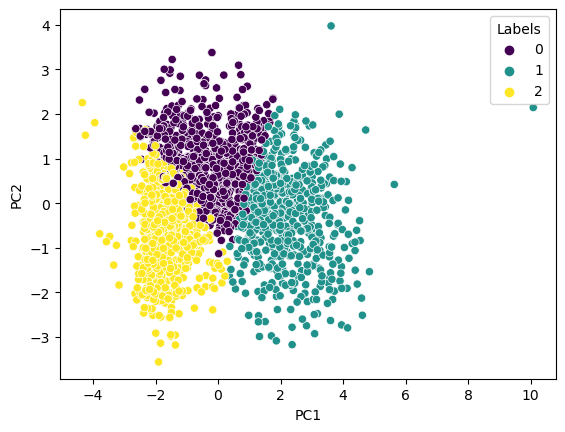

In [29]:
sns.scatterplot(x='PC1', y='PC2', data=kmeans_df, hue='Labels', palette='viridis')

- The visualization of Principal component 1 & 2 also displays presence of three well defined clusters identified.

### 17. Apply Agglomerative clustering and segment the data (Use Original data for clustering), and perform cluster analysis by doing bivariate analysis between the cluster label and different features and write your observations.

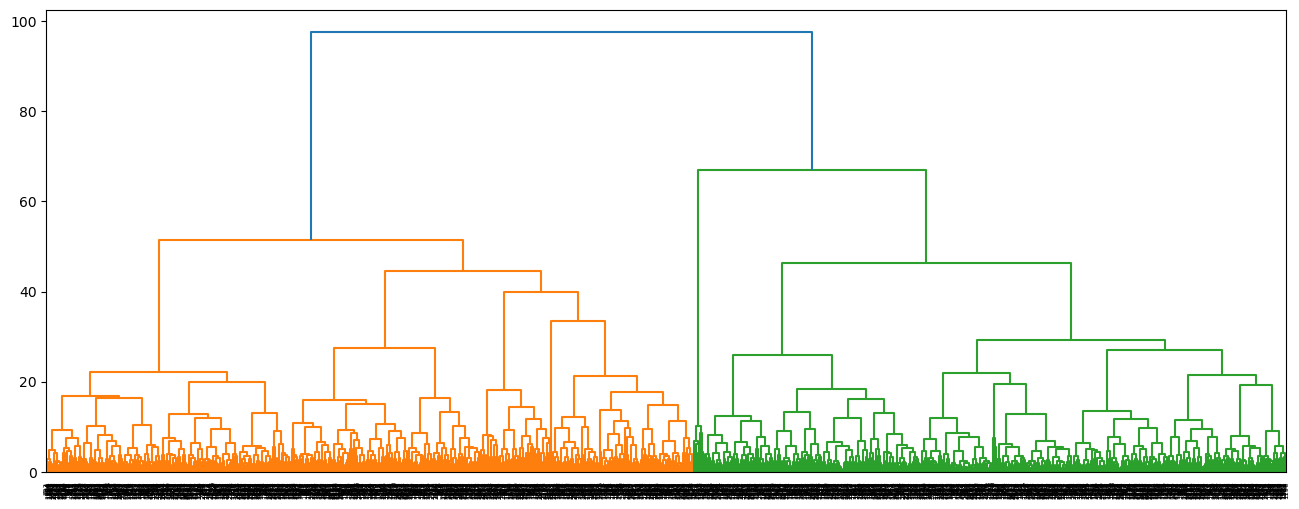

In [30]:
# Drawing the dendrogram for Agglomerative clustering

plt.figure(figsize=(16,6))
merge = linkage(scaled_df,method='ward')
dendrogram(merge, leaf_rotation=90)

plt.show()

- The Dendrogram above shows the presence of 2 big cluster & 1 small cluster

In [31]:
# Getting the Silhouette scores for Agglomorative clustering

from sklearn.metrics import silhouette_score
for i in range(2,25):
    hier = AgglomerativeClustering(n_clusters=i)
    hier_model = hier.fit(scaled_df)
    labels = hier.fit_predict(scaled_df)
    print(i, " => ", silhouette_score(scaled_df,labels))

2  =>  0.19083932398857473
3  =>  0.19859065923137734
4  =>  0.11245037433472571
5  =>  0.11424621756890468
6  =>  0.13181821517825157
7  =>  0.13957002140255273
8  =>  0.13907063102763959
9  =>  0.11337088108662467
10  =>  0.11192131225262125
11  =>  0.10382081162276442
12  =>  0.10893099764937532
13  =>  0.10233949588477731
14  =>  0.09549869159746753
15  =>  0.09916157110888121
16  =>  0.09710952571916635
17  =>  0.09489252379653369
18  =>  0.09364631036870164
19  =>  0.09198831621916269
20  =>  0.09444749865148554
21  =>  0.09485319565745165
22  =>  0.09668011531925658
23  =>  0.10011826448897569
24  =>  0.10008982911821666


- We see the Dendrogram here and the Silhoette scorer indicate that highest score is around cluster size 3 

- We select cluster size K=3 as the optimal cluster size and build a agglomerative clustering model using the original scaled dataset (scaled_df).

In [32]:
## Building hierarchical clustering model using the optimal clusters size as 3 using original data

hie_cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')
hie_cluster_model = hie_cluster.fit(scaled_df)

## Creating a dataframe of the labels
hie_cluster_df = pd.DataFrame({'Labels':hie_cluster.labels_})

hie_cluster_df.head(5)

,Labels
0,0
1,1
2,0
3,1
4,0


In [33]:
## joining the label dataframe with unscaled initial cleaned dataframe.(dfc)

hier_df = dfc.join(hie_cluster_df)
hier_df.head()


,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,age,Labels
0,Graduation,Single,58138.0,58,7,0,1617,25,0,1,67,0
1,Graduation,Single,46344.0,38,5,0,27,6,2,0,70,1
2,Graduation,relationship,71613.0,26,4,0,776,21,0,0,59,0
3,Graduation,relationship,26646.0,26,6,0,53,8,1,0,40,1
4,PhD,relationship,58293.0,94,5,0,422,19,1,0,43,0


### Visualization and Interpretation of results

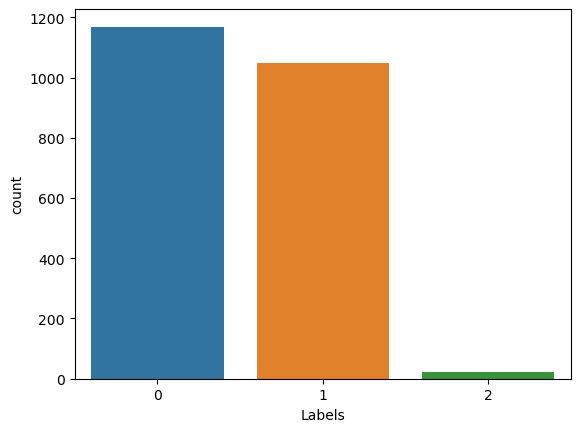

In [34]:
sns.countplot(x='Labels',data=hier_df)
plt.show()

- The count plot reveals that there is 2 Big Clusters - Cluster-'0' & Cluster-'1', and also the presence of a small cluster-'2'.
- This inference was also achieved in the Dendrogram wich we had drawn above.

<Axes: xlabel='Labels', ylabel='Total_Expenses'>

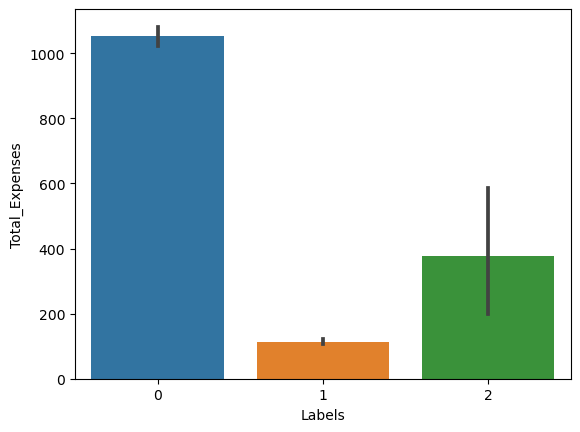

In [35]:
sns.barplot(x='Labels', y='Total_Expenses', data=hier_df )

- The Total_Expenses is much higher for cluster 0 compared to the clusters 1 and 2.

<Axes: xlabel='Labels', ylabel='Income'>

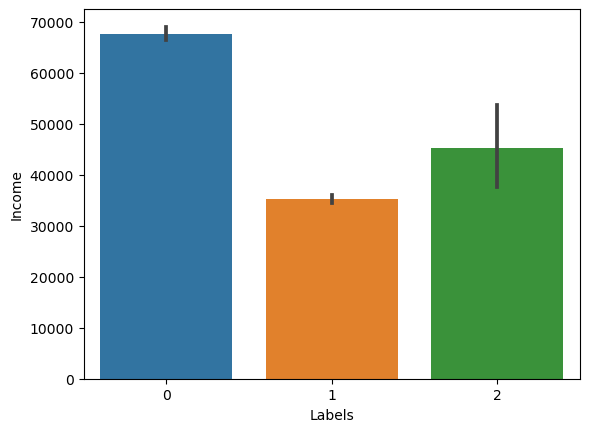

In [36]:
sns.barplot(x='Labels', y='Income', data=hier_df )

- The barplot here infer that Income in Cluster-0 is much higher than the other two clusters-'1' &'2'

<Axes: xlabel='Labels', ylabel='count'>

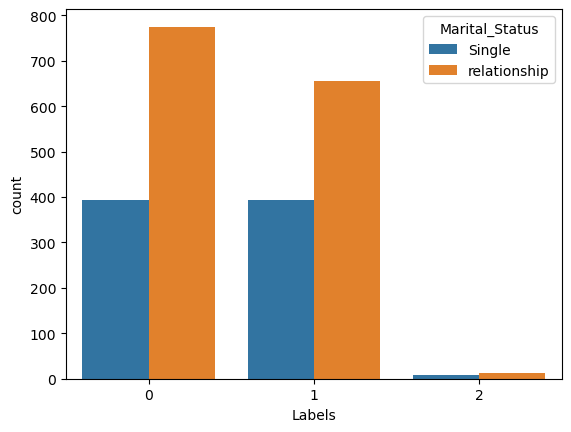

In [37]:
sns.countplot(x='Labels', hue='Marital_Status', data=hier_df )

- We can observe that the most of the customers who are in a relationship falls under cluster '0' or '1'.
- Also, the people in relationship is much higher than Single persons in cluster-'0' & '1' both.

<Axes: xlabel='Labels', ylabel='Num_Total_Purchases'>

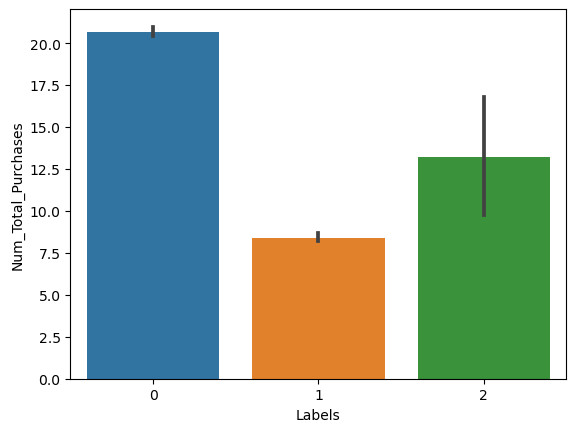

In [38]:
sns.barplot(x='Labels', y='Num_Total_Purchases', data=hier_df )

- The Total number of purchases is much higher for customers from cluster '0' compared to cluster '1' and '2'.

### Conclusion

- We can conclude that maximum purchases are done by customers of cluster 0, has spend maximum amount and have maximum income.

- Where customers belong to cluster 1 has the least Total_expenses, minimum balance and does mimimum purchases compared to other two clusters.

- Customers belong to cluster 2 does average purchases, has average income.

- Customers in relationship are mostly concentrated in cluster '0' & cluster '1' and they outnumber the customers who are single in their respective clusters.

-----
## Happy Learning
-----